In [1]:
import os
import sys
sys.path.append('..')

import joblib

import matplotlib.pyplot as plt
import seaborn as sns

import config as cfg

# Data Preprocessing

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

import config as cfg

def partition_dataset(df, num_a=150, num_b=150, num_c=150, val_a=1.0, val_b=0.0, val_c=2.0):
    df_a = df[df.iloc[:,0] == val_a]
    df_b = df[df.iloc[:,0] == val_b]
    df_c = df[df.iloc[:,0] == val_c]

    mvn = min(df_a.shape[0], df_b.shape[0], df_c.shape[0])

    df_a = df_a.sample(mvn)
    df_b = df_b.sample(mvn)
    df_c = df_c.sample(mvn)

    frames = [df_a, df_b, df_c]
    df = pd.concat(frames)
    
    return df

file_raw_data = pd.read_csv(os.path.join(cfg.DATA_PATH, 'cleaned.csv'))

# data pre-processing steps
# step 1: remove null and unknown values from each column
file_raw_data = file_raw_data.dropna()
for col in file_raw_data.columns:
  file_raw_data = file_raw_data.drop(file_raw_data.loc[file_raw_data[col] == 'Unknown'].index)
  file_raw_data = file_raw_data.drop(file_raw_data.loc[file_raw_data[col] == 'unknown'].index)
# step 2: merge jhs with hs in educ level, remove '1'
file_raw_data['Educational_level'] = file_raw_data['Educational_level'].replace(['Junior high school'], 'High school')
# step 3: merge Darkness - no lighting and Darkness - lights unlit in Light_conditions
file_raw_data['Light_conditions'] = file_raw_data['Light_conditions'].replace(['Darkness - no lighting'], 'Darkness')
file_raw_data['Light_conditions'] = file_raw_data['Light_conditions'].replace(['Darkness - lights unlit'], 'Darkness')
# step 4: merge 'Raining' and 'windy' and 'raining and windy' to raining and/or windy
file_raw_data['Weather_conditions'] = file_raw_data['Weather_conditions'].replace(['Raining'], 'Raining and/or Windy')
file_raw_data['Weather_conditions'] = file_raw_data['Weather_conditions'].replace(['Raining and Windy'], 'Raining and/or Windy')
file_raw_data['Weather_conditions'] = file_raw_data['Weather_conditions'].replace(['Windy'], 'Raining and/or Windy')
# step 5: Vehicle_movement: merge moving back and reverse
file_raw_data['Vehicle_movement'] = file_raw_data['Vehicle_movement'].replace(['Moving Backward'], 'Reversing')
# step 6: cause of accident: changing lane to left and right combine to just changing lane
file_raw_data['Cause_of_accident'] = file_raw_data['Cause_of_accident'].replace(['Changing lane to the left'], 'Changing lane')
file_raw_data['Cause_of_accident'] = file_raw_data['Cause_of_accident'].replace(['Changing lane to the right'], 'Changing lane')
# step 7: cause of accident: merge drunk driving and drug driving to driving under the influence, merge driving fast and overspeed
file_raw_data['Cause_of_accident'] = file_raw_data['Cause_of_accident'].replace(['Driving under the influence of drugs'], 'Driving under the influence')
file_raw_data['Cause_of_accident'] = file_raw_data['Cause_of_accident'].replace(['Drunk driving'], 'Driving under the influence')
file_raw_data['Cause_of_accident'] = file_raw_data['Cause_of_accident'].replace(['Overspeed'], 'Driving at high speed')
# step 8: pedestrian movement: merge 'crossing from...' into one, merge 'walking along in carriage...' into one, merge 'In carriageway,...' into 'In carriageway, not crossing'
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['Crossing from driver\'s nearside'], 'Crossing')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle'], 'Crossing')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle'], 'Crossing')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)'], 'In carriageway, not crossing')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'], 'In carriageway, not crossing')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['Walking along in carriageway, back to traffic'], 'Walking along in carriageway with traffic')
file_raw_data['Pedestrian_movement'] = file_raw_data['Pedestrian_movement'].replace(['Walking along in carriageway, facing traffic'], 'Walking along in carriageway with traffic')

df = pd.get_dummies(file_raw_data ,columns = file_raw_data.columns.difference(['Accident_severity']))
df = df.reset_index().drop(['index'], axis=1)

training = partition_dataset(df)

training.to_csv(os.path.join(cfg.DATA_PATH, 'cleaned_full.csv'), index=False)

impt_features = ['Accident_severity',
 'Cause_of_accident_Moving Backward',
 'Driving_experience_2-5yr',
 'Lanes_or_Medians_Undivided Two way',
 'Light_conditions_Darkness - lights lit',
 'Light_conditions_Daylight',
 'Pedestrian_movement_In carriageway, not crossing',
 'Road_surface_type_Other',
 'Types_of_Junction_Crossing',
 'Vehicle_movement_Overtaking',
 'Weather_conditions_Normal']

training = training[impt_features]



X = training.drop(columns=['Accident_severity'])
y = training['Accident_severity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

df_train = X_train.copy()
df_train['Accident_severity'] = y_train

df_test = X_test.copy()
df_test['Accident_severity'] = y_test

# Saving Datasets
df_train.to_csv(os.path.join(cfg.DATA_PATH, 'cleaned_train.csv'), index=False)
df_test.to_csv(os.path.join(cfg.DATA_PATH, 'cleaned_test.csv'), index=False)

In [10]:
training

,Accident_severity,Cause_of_accident_Moving Backward,Driving_experience_2-5yr,Lanes_or_Medians_Undivided Two way,Light_conditions_Darkness - lights lit,Light_conditions_Daylight,"Pedestrian_movement_In carriageway, not crossing",Road_surface_type_Other,Types_of_Junction_Crossing,Vehicle_movement_Overtaking,Weather_conditions_Normal
6725,1,0,0,0,0,0,0,0,0,0,1
3848,1,0,0,0,1,0,0,0,1,0,0
6509,1,0,0,1,0,0,0,0,0,0,1
5379,1,0,0,0,0,1,0,0,0,0,1
4092,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5985,2,0,0,0,1,0,0,0,0,0,0
1729,2,0,0,0,1,0,0,0,0,0,1
5164,2,0,0,0,0,1,0,0,1,0,1
2237,2,0,1,0,0,1,0,0,0,0,1


# Feature Relevance

For our feature relevance technique, we used a correlation metrix to get the correlation between the target and the features. To do this, the correlation matrix was generated and then filtered based on the features that have a correlation > a specific threshold or a correlation < a specific negative threshold. We filtered the original dataset to only have those features. The main goal of feature relevance is to remove noise in the dataset that the model can potentially learn that harms or doesn't help the model. 

In [11]:
import matplotlib.pyplot as plts
import seaborn as sns
import pandas as pd

import config as cfg

df = pd.read_csv(os.path.join(cfg.DATA_PATH, 'cleaned_full.csv'))
df.head()

,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Cause_of_accident_Changing lane,Cause_of_accident_Driving at high speed,Cause_of_accident_Driving carelessly,Cause_of_accident_Driving to the left,Cause_of_accident_Driving under the influence,...,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Waiting to go,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining and/or Windy,Weather_conditions_Snow
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
correl = df.corr()

THRESHOLD = 0.1

# filter only the features that have correlation > THRESHOLD and a correlation < -THRESHOLD
best_cols = correl[(correl['Accident_severity'] > THRESHOLD) | (correl['Accident_severity'] < -THRESHOLD)]['Accident_severity']

best_c = list(best_cols.index)

best_cols

Accident_severity                         1.000000
Cause_of_accident_Moving Backward        -0.155158
Cause_of_accident_Other                   0.104299
Driving_experience_2-5yr                 -0.138055
Driving_experience_Below 1yr              0.112559
Lanes_or_Medians_Undivided Two way       -0.150629
Light_conditions_Darkness - lights lit   -0.109304
Light_conditions_Daylight                 0.131924
Types_of_Junction_Crossing                0.191023
Types_of_Junction_No junction            -0.145750
Vehicle_movement_Overtaking              -0.114897
Name: Accident_severity, dtype: float64

In [13]:
best_c

['Accident_severity',
 'Cause_of_accident_Moving Backward',
 'Cause_of_accident_Other',
 'Driving_experience_2-5yr',
 'Driving_experience_Below 1yr',
 'Lanes_or_Medians_Undivided Two way',
 'Light_conditions_Darkness - lights lit',
 'Light_conditions_Daylight',
 'Types_of_Junction_Crossing',
 'Types_of_Junction_No junction',
 'Vehicle_movement_Overtaking']

# Modelling with Hyperparameter Optimization

All modelling code is placed in the modules package under the tuning subpackage. It uses a trainer that does Bayesian Hyperparameter Optimization with a 5 Stratified K Fold as its objective function. The objective function is the ROC_AUC of the model. 

In [14]:
import torch
import joblib

from modules.tuning.trainer import AccidentSeverityModelTuner

import config as cfg


mt = AccidentSeverityModelTuner(10, 3)
params = mt.get_tuned_params()

print(params)

joblib.dump(params, os.path.join(cfg.MODELS_PATH, 'BestParams.joblib'))

100%|██████████| 24/24 [25:04<00:00, 62.69s/trial, best loss: -0.589367816091954]   
Fold: 1	-	Epoch: 100	-	Loss: 1.2105	-	Accuracy: 0.3409	-	ROC-AUC: 0.5000
Fold: 2	-	Epoch: 100	-	Loss: 1.1328	-	Accuracy: 0.4186	-	ROC-AUC: 0.5686
Fold: 3	-	Epoch: 100	-	Loss: 1.1096	-	Accuracy: 0.4419	-	ROC-AUC: 0.5819
Fold: 4	-	Epoch: 100	-	Loss: 1.0398	-	Accuracy: 0.5116	-	ROC-AUC: 0.6412
Fold: 5	-	Epoch: 100	-	Loss: 1.2026	-	Accuracy: 0.3488	-	ROC-AUC: 0.5108
{'activation': 1, 'batch_size': 9, 'decay_rate': 0.2034892957356317, 'learning_rate': 0.0005817047702827658, 'num_layers': 2, 'start_nodes': 973, 'input_dim': 10, 'output_dim': 3}


['c:\\Users\\paolo\\OneDrive\\Desktop\\Academic Resources\\DISCS Resources\\CSCI 114\\Project\\notebooks\\..\\models\\BestParams.joblib']

# Metrics and Results

The Model Selected is the best performing of the 5 KFolds after Hyperparameter Optimization

In [15]:
tlc = joblib.load(os.path.join(cfg.MODELS_PATH, 'AccidentSeverityTrainLossCurve.joblib'))
vlc = joblib.load(os.path.join(cfg.MODELS_PATH, 'AccidentSeverityValLossCurve.joblib'))

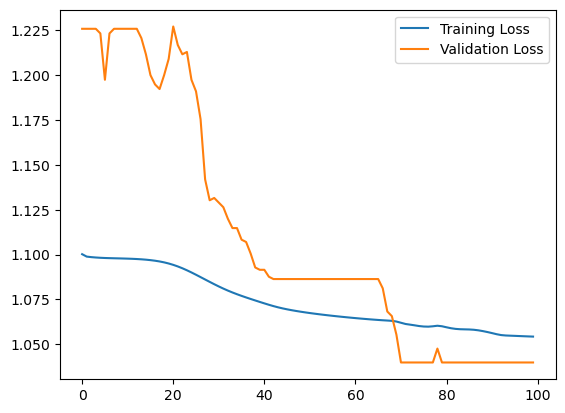

In [16]:
plt.plot(tlc, label='Training Loss')
plt.plot(vlc, label='Validation Loss')
plt.legend()
plt.show()

<AxesSubplot:>

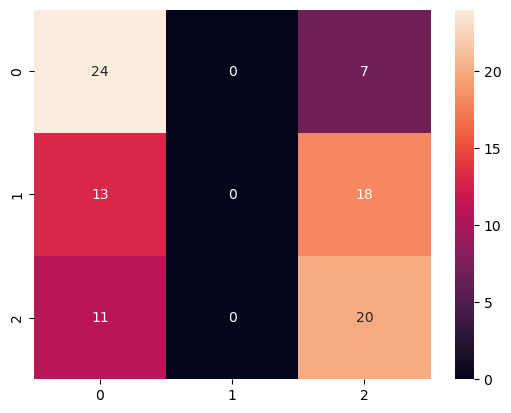

In [17]:
cm = joblib.load(os.path.join(cfg.MODELS_PATH, 'AccidentSeverityConfusionMatrix.joblib'))

sns.heatmap(cm, annot=True)

In [18]:
ra = joblib.load(os.path.join(cfg.MODELS_PATH, 'AccidentSeverityTestROCAUC.joblib'))

print(ra)

0.6048387096774194
